### ***Задание 1***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

MSELoss function

In [ ]:
simplenet = torch.nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.Sigmoid()
)

In [ ]:
data = pd.read_csv("./apples_pears.csv")

X = data.iloc[:,:2].values 
X = torch.tensor(X, dtype=torch.float, requires_grad=True)

y = data['target'].values.reshape((-1, 1))
y = torch.tensor(y, dtype=torch.float, requires_grad=True)

loss_fn = nn.MSELoss()

In [ ]:
learning_rate = 0.001
optimizer = torch.optim.Adam(simplenet.parameters(), lr=learning_rate)

for t in range(500):
    optimizer.zero_grad()
    y_pred = simplenet(X)
    loss = loss_fn(y_pred, y)

    if t % 100 == 0:
      print('{} {}'.format(t, loss.data))

    loss.backward()
    optimizer.step()

0 0.2783794701099396
100 0.2568262815475464
200 0.2375389188528061
300 0.22076500952243805
400 0.20645633339881897


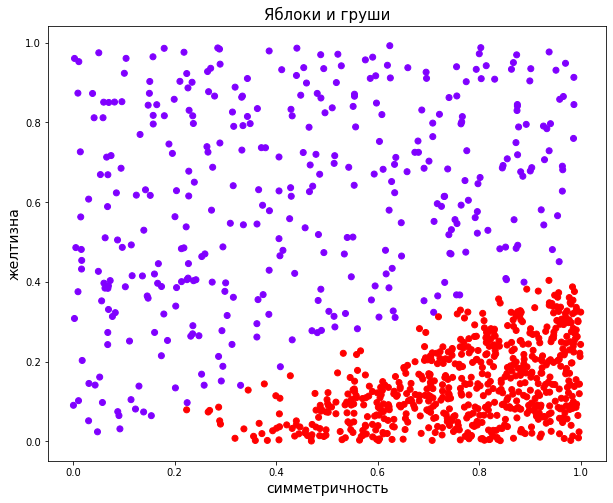

In [ ]:
proba_pred = simplenet(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

CrossEntropyLoss function

In [ ]:
simplenet = torch.nn.Sequential(
    nn.Linear(2, out_features=1),
    nn.Sigmoid()
)

In [ ]:
data = pd.read_csv("./apples_pears.csv")

X = data.iloc[:,:2].values 
X = torch.tensor(X, dtype=torch.float, requires_grad=True)

y = data['target'].values.reshape((-1, 1))
y = torch.tensor(y, dtype=torch.float, requires_grad=True)

loss_fn = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.001
optimizer = torch.optim.SGD(simplenet.parameters(), lr=learning_rate)

for t in range(900):
    optimizer.zero_grad()
    y_pred = simplenet(X)
    loss = loss_fn(y_pred, y)

    if t % 100 == 0:
      print('{} {}'.format(t, loss.data))

    loss.backward()
    optimizer.step()

0 -0.0
100 -0.0
200 -0.0
300 -0.0
400 -0.0
500 -0.0
600 -0.0
700 -0.0
800 -0.0


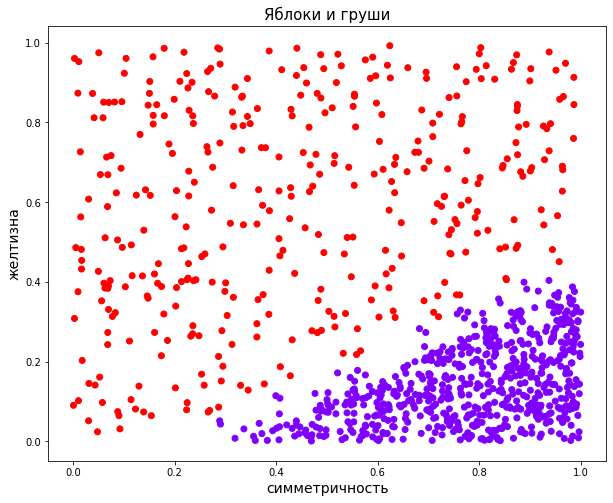

In [ ]:
proba_pred = simplenet(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

NLLLoss function

In [ ]:
simplenet = torch.nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid(),
)

In [ ]:
data = pd.read_csv("./apples_pears.csv")

X = data.iloc[:,:2].values 
X = torch.tensor(X, dtype=torch.float, requires_grad=True)

y = data['target'].values.reshape((-1, 1))
y = torch.tensor(y, dtype=torch.float, requires_grad=True)

loss_fn = nn.CrossEntropyLoss()

In [ ]:
learning_rate = 0.001
optimizer = torch.optim.Adam(simplenet.parameters(), lr=learning_rate)

for t in range(600):
    optimizer.zero_grad()
    y_pred = simplenet(X)
    loss = loss_fn(y_pred, y)

    if t % 100 == 0:
      print('{} {}'.format(t, loss.data))

    loss.backward()
    optimizer.step()

0 -0.0
100 -0.0
200 -0.0
300 -0.0
400 -0.0
500 -0.0


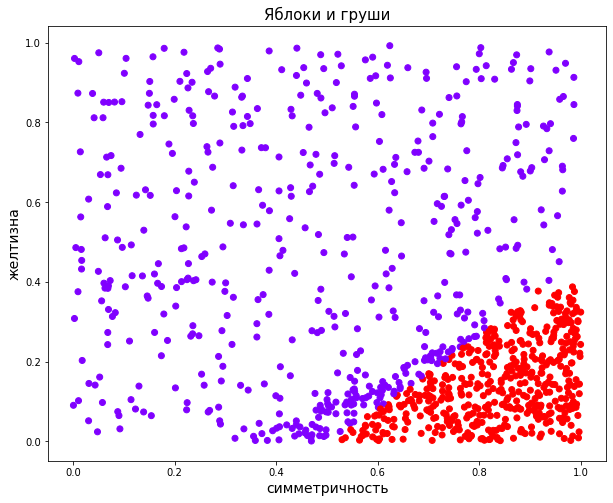

In [ ]:
proba_pred = simplenet(X)
y_pred = proba_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('симметричность', fontsize=14)
plt.ylabel('желтизна', fontsize=14)
plt.show()

## ***Задание 2***


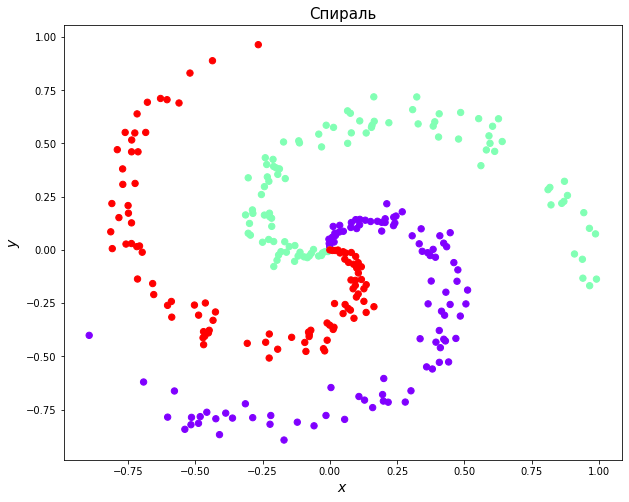

In [ ]:
N = 100 # N - размер батча (batch_size, нужно для метода оптимизации)
D = 2 # D - размерность входа (количество признаков у объекта)
K = 3 # D_out - размерность выходного слоя (суть -- количество классов)
X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype='uint8')

for j in range(K):
    ix = range(N * j,N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4,N) + np.random.randn(N) * 0.2 # theta
    X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y[ix] = j

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)
plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()

In [ ]:
X_2 = X ** 2
X = np.append(X, X_2, axis=1)
X

In [ ]:
X = torch.tensor(X, dtype=torch.float, requires_grad=True)
y = torch.tensor(y, dtype=torch.int64)

In [ ]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# D_out - размерность выходного слоя (суть -- количество классов)
N, D_in, D_out = 64, 2, 3

neuron = nn.Sequential(
    nn.Linear(2, 20),
    nn.ReLU(),
    nn.Linear(20, 15),
    nn.ReLU(),
    nn.Linear(15, 10),
    nn.ReLU(),
    nn.Linear(10, 4),
    nn.ReLU(),
    nn.Linear(4, 3),
    nn.ReLU()
)

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)
for t in range(3000):
    # forward
    y_pred = neuron(X)

    # loss
    loss = loss_fn(y_pred, y)
    print('{} {}'.format(t, loss.data))

    # зануляем градиенты с предыдущего шага
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем веса 
    optimizer.step()

In [ ]:
# Обратно в Numpy для отрисовки
X = X.data.numpy()
y = y.data.numpy()

In [ ]:
X.shape

(300, 2)

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

p = np.c_[xx.ravel(), yy.ravel()]
# p = np.expand_dims(p, axis=0)
print(p)

[[-1.89772272 -1.86574531]
 [-1.87772272 -1.86574531]
 [-1.85772272 -1.86574531]
 ...
 [ 1.94227728  1.97425469]
 [ 1.96227728  1.97425469]
 [ 1.98227728  1.97425469]]


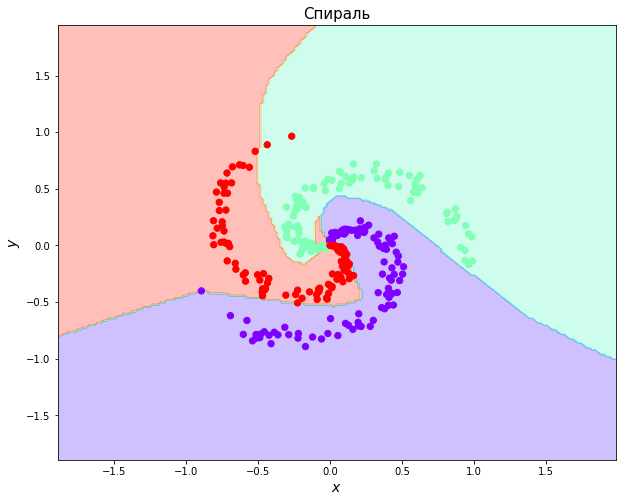

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_tensor = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])

Z = neuron(torch.autograd.Variable(grid_tensor))
Z = Z.data.numpy()
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.rainbow)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.title('Спираль', fontsize=15)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.show()